# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [31]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:** 1) The smartcab does not move at all during the simulation, but all other cars do;

2) The driving agent is receiving either positive or negative rewards;

3) When the traffic light is green, if the smartcab does not take an action it receives a negative reward (unless there was incoming traffic); otherwise, if the traffic red and the smartcab correctly idles, it receives a positve reward. 

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:** 
- *`agent.py`*: I choose the following three flags: 1) learning (which is a boolean set at False by default) and performs a switch between the smartcab learning modes '`ON/OFF`', 2) epsilon, which is called 'random exploration factor'. It is used so that the smartcab chooses a given random action with epsilon probability when learning is `True`; and 3) alpha, which takes 0.5 as default value and it represents the Q-learning called 'learning rate', i.e. it works as a weight on how much to consider future utility given the learing environment (alpha is usually between 0 and 1). 

- *`environment.py`*: the function '`act(self, agent, action)`' is called when an agent performs an action.

- *`smulator.py`*: the '`render_text()`' function prints the simulation outputs on the command_prompt in `Python`, while the '`render()`' function prints this information on the GUI in Pygame directly.

- *`planner.py`*: the '`next_waypoint`' function will consider the East-West direction first.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'Left'` (turn left), `'Right'` (turn right), or `'Forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!


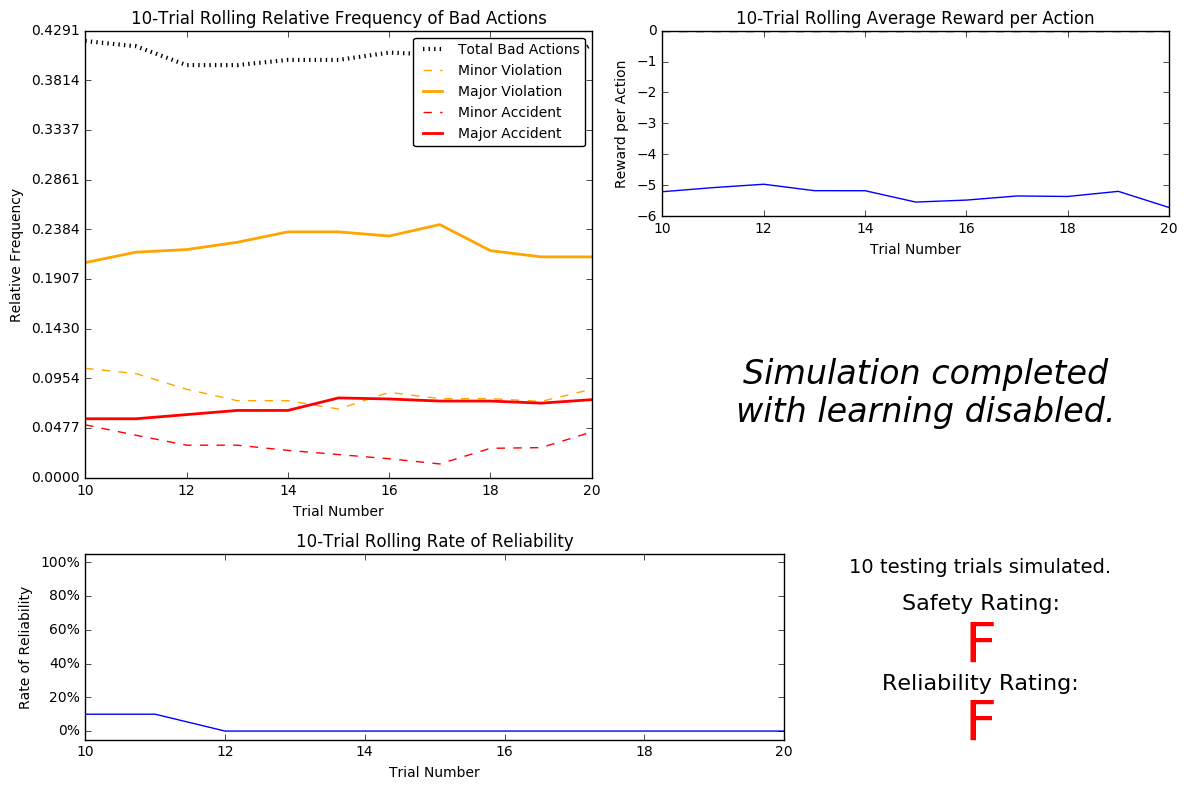

In [32]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliabilty make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:** - The driving agent is making bad decisions with a frequence of about 40%. The smartcab has between 5% and 10% of major accidents and less than 5% minor accidents. 

- The reliability rating of `'F'` makes perfect sense given that the agent is driving randomly.

- The agent is always receiving average negative rewards to its actions. The rewards suggest it has been penalized quite heavily. The driver in fact receives an average cumulative net reward of -95 in the testing phase and -125 in the non-testing phase.

- As the number of trials increases, the outcome of results does not change significantly. In fact, the agent performs rather constantly bad.

- The smartcab would not be considered safe or reliable for its passengers at all. Both safety and reliability ratings are in fact `'F'`, which is the lowest possible rating for both cathegories.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate?*

**Answer:** A feature such as `'waypoint'` is important for efficiency, as it will provide the smartcab with the information on where to go to get to the destination.

The `'light'` input is extremely important for safety, because if it is ignored it can cause accidents.
The `'left'` input is important for safety, as the *Smartcab* may want to take a right turn on a red light, and it could get into an accident if a car is arriving from the left direction.
The '`right`' input is perhaps less important, as in the current *Smartcab* environment the other cars are not allowed to 'make mistakes' and take improper actions, like ingoring a red light when the *Smartcab* has green and it is coming from the left of the car ignoring a red light. However, this could be a very useful information in a real-world scenario to avoid accidents (so, it would be very important for *safety*).
The `'oncoming'` input (like the `'right'` input) is very useful if the *Smartcab* wants to take a left turn. Without this information, the *Smartcab* could crash against a car coming in the opposite direction while attempting a left turn.

Finally, `'deadline'` is of course crucial for *efficiency*, as the *Smartcab* will know how long (i.e how many moves) it still has left to get to the destination on time. However, given that it has only one possible state, which is the number indicating how many steps the *Smartcab* has left, I would not include it in the State space.

Given that if we include too many features it would be hard for the *Smartcab* to learn, given that the state space would grow exponentially. So, trying to keep the state space small, the only two features that I would not give up are '`waypoint`' and '`light`'. With such a small state space, it is unlikely the *Smartcab* will commit violations in the testing phase, while it still may not be very good at reaching its destination consistently.

So, in conclusion, the features I would pick to best impact **safety** and **efficiency** are only '`waypoint`' and '`light`'.

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the evironment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:** The features I have selected in *Question 4* to define the state of the *Smartcab* are:

`('waypoint', 'light')`.

The feature `waypoint` can take `3` values: `forward`, `right`, or `left`.
The feature `light` can take `2` values: `red` or `green`.

So, in this case the **size of the state space** (the total number of states) would be **`6`** (i.e. `3` states for `waypoint` times `2` states for `light`).

Given that the size of this state space is rather small, I think the *Smartcab* could learn a policy for each possible state within a reasonable number of training trials.

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the interative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.01). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

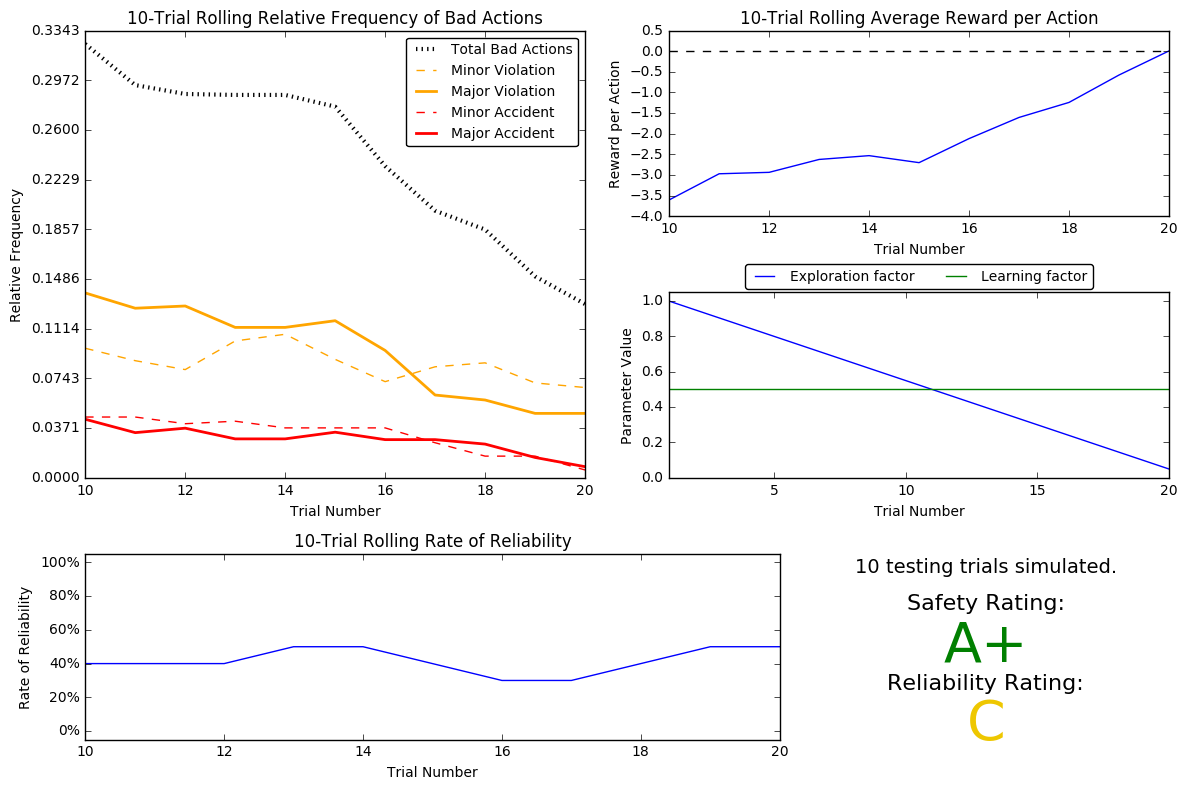

In [69]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:** The grpahs above show a general improvement of the *Smartcab* once learning is switched on.
The graph on the top-left shows that the number of total bad actions dimishes as the number of trials increases, going from about 33% down to 15% (so a 50% improve). Also, we can see from the top-right graph that the average reward per action dramatically improves from about -4 to 0.
These two graphs show that the *Smartcab* is effectively able to learn as the trial number increases.

In the Exploration/learning graph reports the equivalent values of epsilon and alpha as the trial number increases (going from 0 to 20). The reliability graph instead shows that the *Smartcab* is not able to improve its reliability with the number of trials. Its rate of realibility hoovers around 40% and does not manage to significantly pick up from there. This means that (as Reliability indicates the frequency by which the *Smartcab* manages to reach the destination on time) the Smartcab should fail to reach the destination on time for at least 60% of the trials.

However, we can see that, in this particular case, the Safety Rating is A+ (meaning that the *Smartcab* does not commit traffic violations and always chooses the correct action) but the Reliability Rating is C (indicating that the Agent reaches the destination on time for at least 70% of trips). This latter rating is in contrast with the rating we could have expected from the training section, when we saw the average reliability was about 40/50%, i.e. the reliability score should have come out as an "F" instead of "C". This fact may be peculiar to the specific set of 10 tests performed by the agent, where the agent managed to reach the destination on time for 7 out of 10 of the testing runs.
I have tried re-running the simulation a few times and the Agent tend to get an "F" or a "D" in reliability rating more often than "C" or any other rating. In fact, I have tried with `n_test=100` and I have noticed that `63%` of the times the agent managed to reach the destination on time (i.e. a reliability rating of "D").

In light of this, in the Q-learning improvement section coming next, I will have to try to mantain the "A+" rating in Safety and try to improve the "C" rating in Reliability.

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the impliciations it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

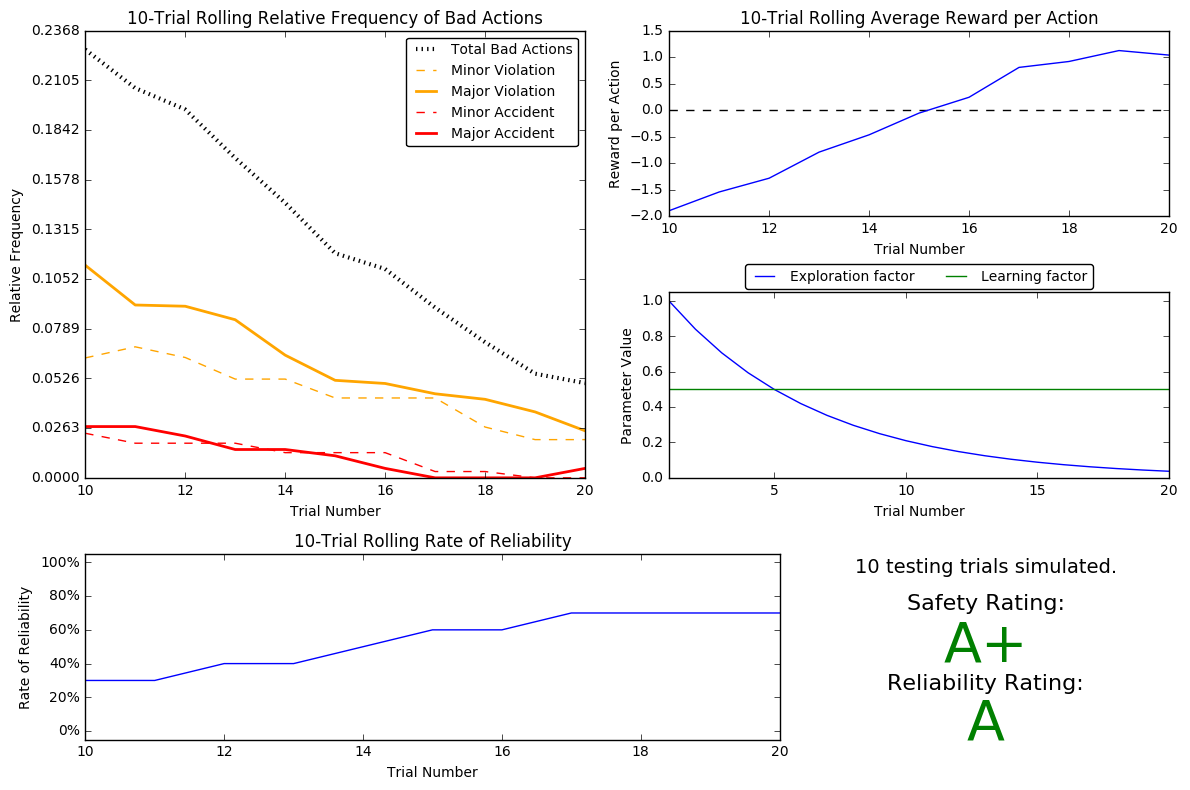

In [82]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:** We can see that we managed to improve the ratings of the *Smartcab*. In particular, we mangaged to mantain the "A+" Safety Rating while improving the Reliability Rating from "C" to "A". This means that the Agent now Agent reaches the destination on time for at least 90% of trips.

After some testing and fine-tuning, I have picked the following decaying function for epsilon (the exploration factor):

$$ \epsilon = e^{-\frac{1}{4} at}, \textrm{ for }  a = 0.5 $$

The reason why I have added the $\frac{1}{4}$ factor in the exponential is because I wanted the decaying to smoothly drop to `0` (hence to switch to the `tolerance` rate in the simulation), rather than dropping to `0` too fast within the first `5` or `6` runs of the training phase (which is the case by not including this factor). Including this factor proved valuable at improving the Reliability rating. In the Exploration/Learning factor plot above, we can see how the epsilon drops smoothly towards `0` as the number of trials increases.

In the top-left graph, we can see that the *Smartcab* even accelarated in learning "Safety" compared to the non-optimized version. In fact, the Total number of bad actions drops to about `5%` during the training, compared to ~`14%` in the non-ptimized learning environment. 

We've also got an improvement in the Average reward per action of the agent. In fact, the average reward per action now goes above `0` (at ~`1`) within the 20 training trials, while before it was just approaching `0`.

If we look at rate of reliability graph however, we see an improvement (after the training trials) as we now get to almost `70%` vs the `~50%` we had in the non-optimized environment. As a result, the reliability score is higher (we now get an "A" vs a "C" before).

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8
Provide a few examples (using the states you've defined) of what an optimal policy for this problem would look like. Afterwards, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ Provide an example of a state and all state-action rewards recorded, and explain why it is the correct policy.

**Answer:** For example, using the state I have defined, an optimal policy for this problem would look like:

`state: ('forward', 'red'), action: 'None'` <br>
`state: ('left', 'green'), action: 'left'` <br>
`state: ('right', 'green'), action: 'right'` <br>

The file '`sim_improved-learning.txt`' shows the following Q-table:

/-----------------------------------------
| State-action rewards from Q-Learning
\-----------------------------------------

('forward', 'red')
 -- forward : -11.91
 -- None : 2.07
 -- right : -5.73
 -- left : -8.58

('right', 'green')
 -- forward : 0.34
 -- None : -5.36
 -- right : 2.15
 -- left : -9.42

('right', 'red')
 -- forward : -14.96
 -- None : 0.70
 -- right : 1.43
 -- left : -9.05

('left', 'green')
 -- forward : 0.20
 -- None : -4.77
 -- right : 1.19
 -- left : -4.53

('left', 'red')
 -- forward : -26.56
 -- None : 2.25
 -- right : -10.31
 -- left : -11.44

('forward', 'green')
 -- forward : 1.87
 -- None : -4.07
 -- right : 0.40
 -- left : 0.53

We can see from above that the Q-learning table provides the optimal move for the agent in the states: 

('forward', 'red'), ('right', 'green'), ('left', 'red'), ('forward', 'green')

Instead, the *Smartcab* will take a sub-optimal move in the two following states:

('right', 'red'), ('left', 'green')

In fact, in the ('right', 'red') state the maximum reward action is `right` (with reward `1.43`), which 'wins' over the optimal choice `None` (reward `0.70`).
Also, in the state defined by ('left', 'green'), the Agent would take the action `right` instead of the optimal action `left`, as `1.19 > -4.53`. In this state the agent would permorm poorly, as the second best action from the Q-table would be `forward`, with a `0.2` reward.

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propogating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:** I believe it has to do with the way rewards are assigned. In fact, there is a penalty function in the rewards that penalizes the agent's reward the more time approaches the deadline.
This way, the agent is forced to take improper actions, such as violating red traffic lights, in order to maximize its rewards which get negatively skewed as the deadline approaches. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.